In [1]:
from commons import *
from dataset_loader import load_dataset_with_cache
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

def load_and_test(dataset, aug, autoencoder, acache):
    train_set = load_dataset_with_cache(dataset, aug)
    print('%s: %d' % (dataset, len(train_set)))
    autoencoder = train_or_cache(train_set, autoencoder, '%s_%s' % (acache, dataset))

    for df_func, df_name in zip(
            [dm_func_mean, dm_func_avg_hash, dm_func_p_hash, dm_func_d_hash, dm_func_haar_hash, dm_func_db4_hash, dm_func_cr_hash, dm_func_color_hash],
            ['mean', 'aHashref', 'pHashref', 'dHashref', 'wHashref_haar', 'wHashref_db4', 'crop_resistant_hashref', 'colorhash']
    ):
        for img_set, set_names in zip([train_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = "cache/%s_vis_%s_%d_%s.png" % (acache, set_names, aug, df_name)
            hist_path = "cache/%s_hist_%s_%d_%s.png" % (acache, set_names, aug, df_name)
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = "%s_vis_%s_%d_%s_full.png" % (acache, set_names, aug, df_name)
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)

In [2]:
autoencoder = original_autoencoder()
autoencoder.summary()

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 60, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                249616    
                                                                 
 decoder (Functional)        (None, 60, 60, 1)         300865    
                                                                 
Total params: 550,481
Trainable params: 550,097
Non-trainable params: 384
_________________________________________________________________


dots: 535
Epoch 1/50
17/17 [==============================] - 8s 237ms/step - loss: 8.7295
Epoch 2/50
17/17 [==============================] - 4s 256ms/step - loss: 8.6091
Epoch 3/50
17/17 [==============================] - 4s 248ms/step - loss: 8.5656
Epoch 4/50
17/17 [==============================] - 4s 228ms/step - loss: 8.5547
Epoch 5/50
17/17 [==============================] - 5s 270ms/step - loss: 8.5515
Epoch 6/50
17/17 [==============================] - 4s 229ms/step - loss: 8.5500
Epoch 7/50
17/17 [==============================] - 4s 230ms/step - loss: 8.5492
Epoch 8/50
17/17 [==============================] - 4s 231ms/step - loss: 8.5488
Epoch 9/50
17/17 [==============================] - 5s 289ms/step - loss: 8.5485
Epoch 10/50
17/17 [==============================] - 5s 271ms/step - loss: 8.5484
Epoch 11/50
17/17 [==============================] - 4s 246ms/step - loss: 8.5483
Epoch 12/50
17/17 [==============================] - 4s 244ms/step - loss: 8.5481
Epoch 13/50
17/

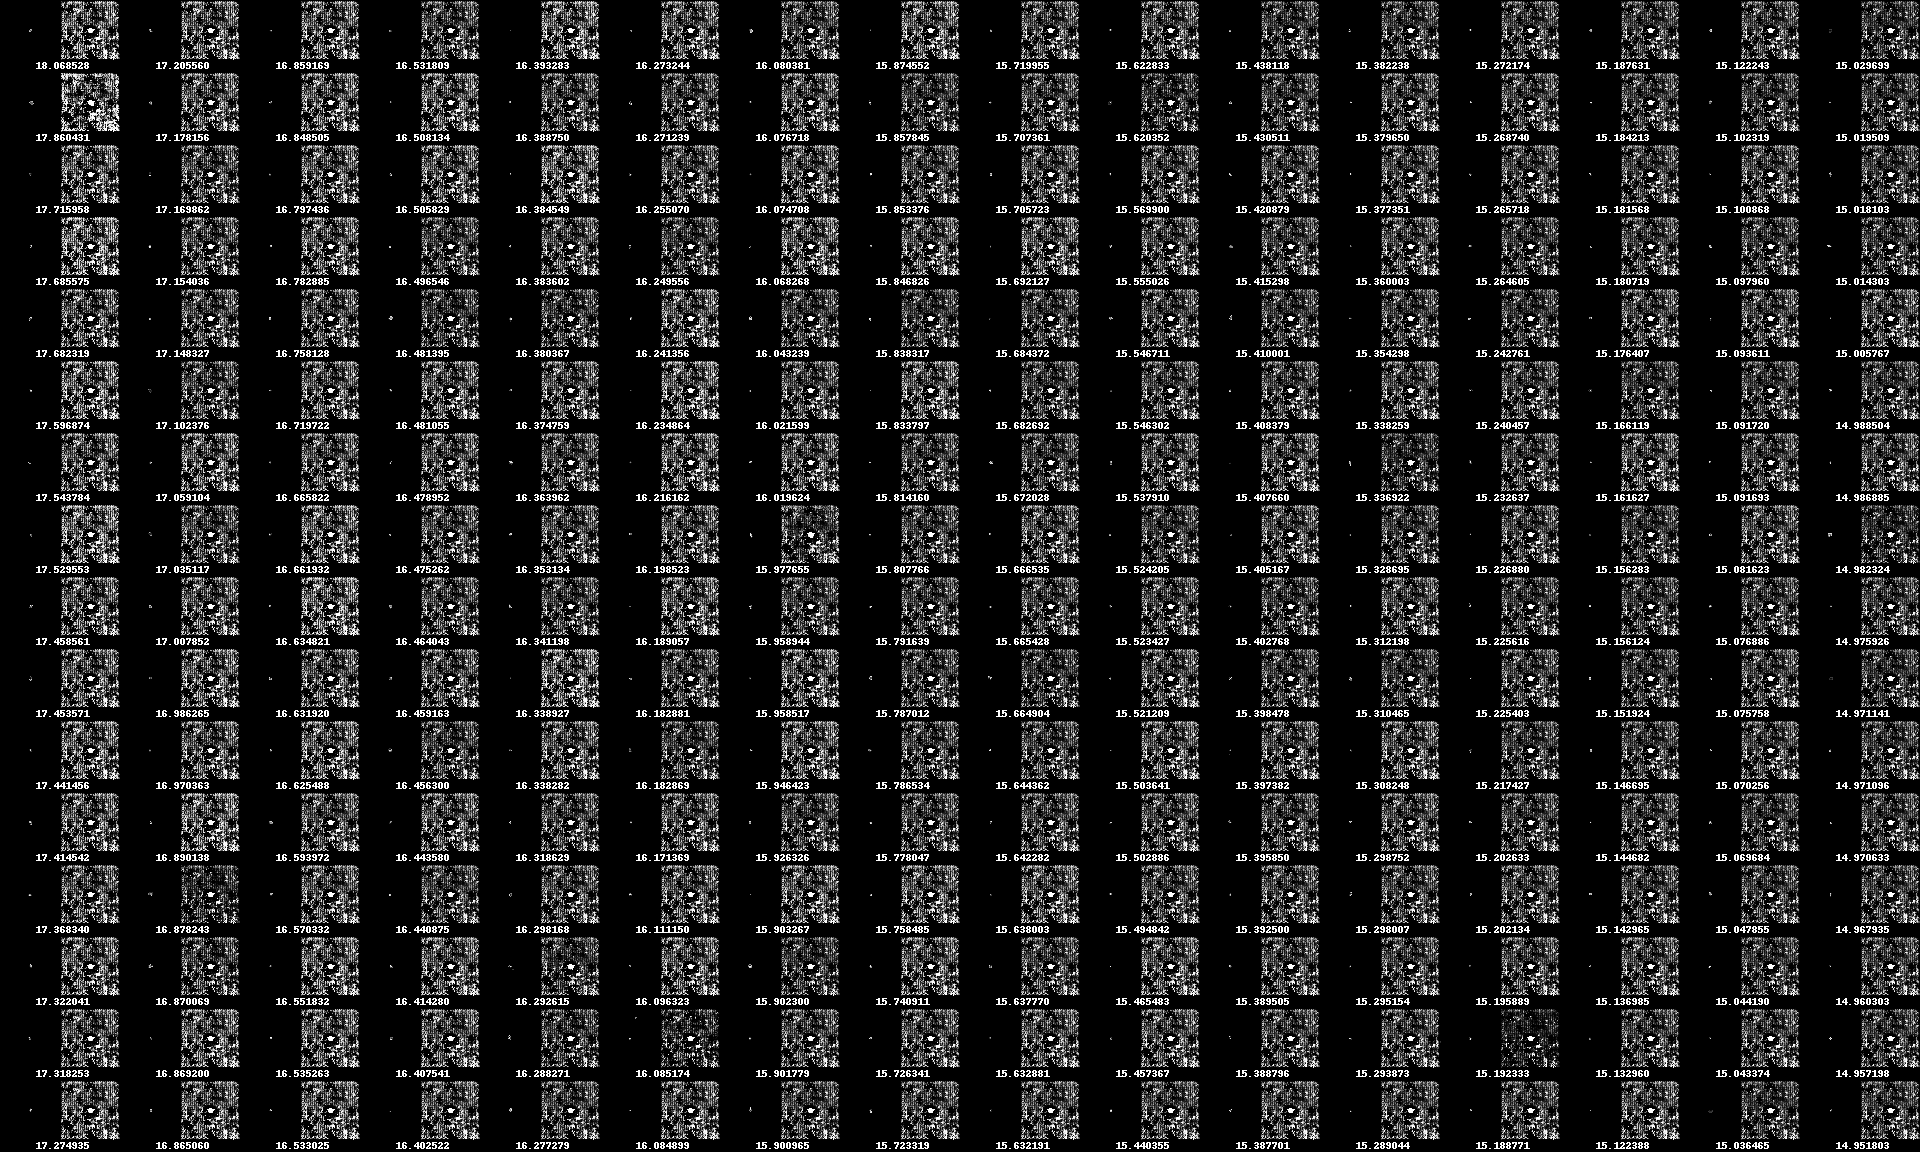

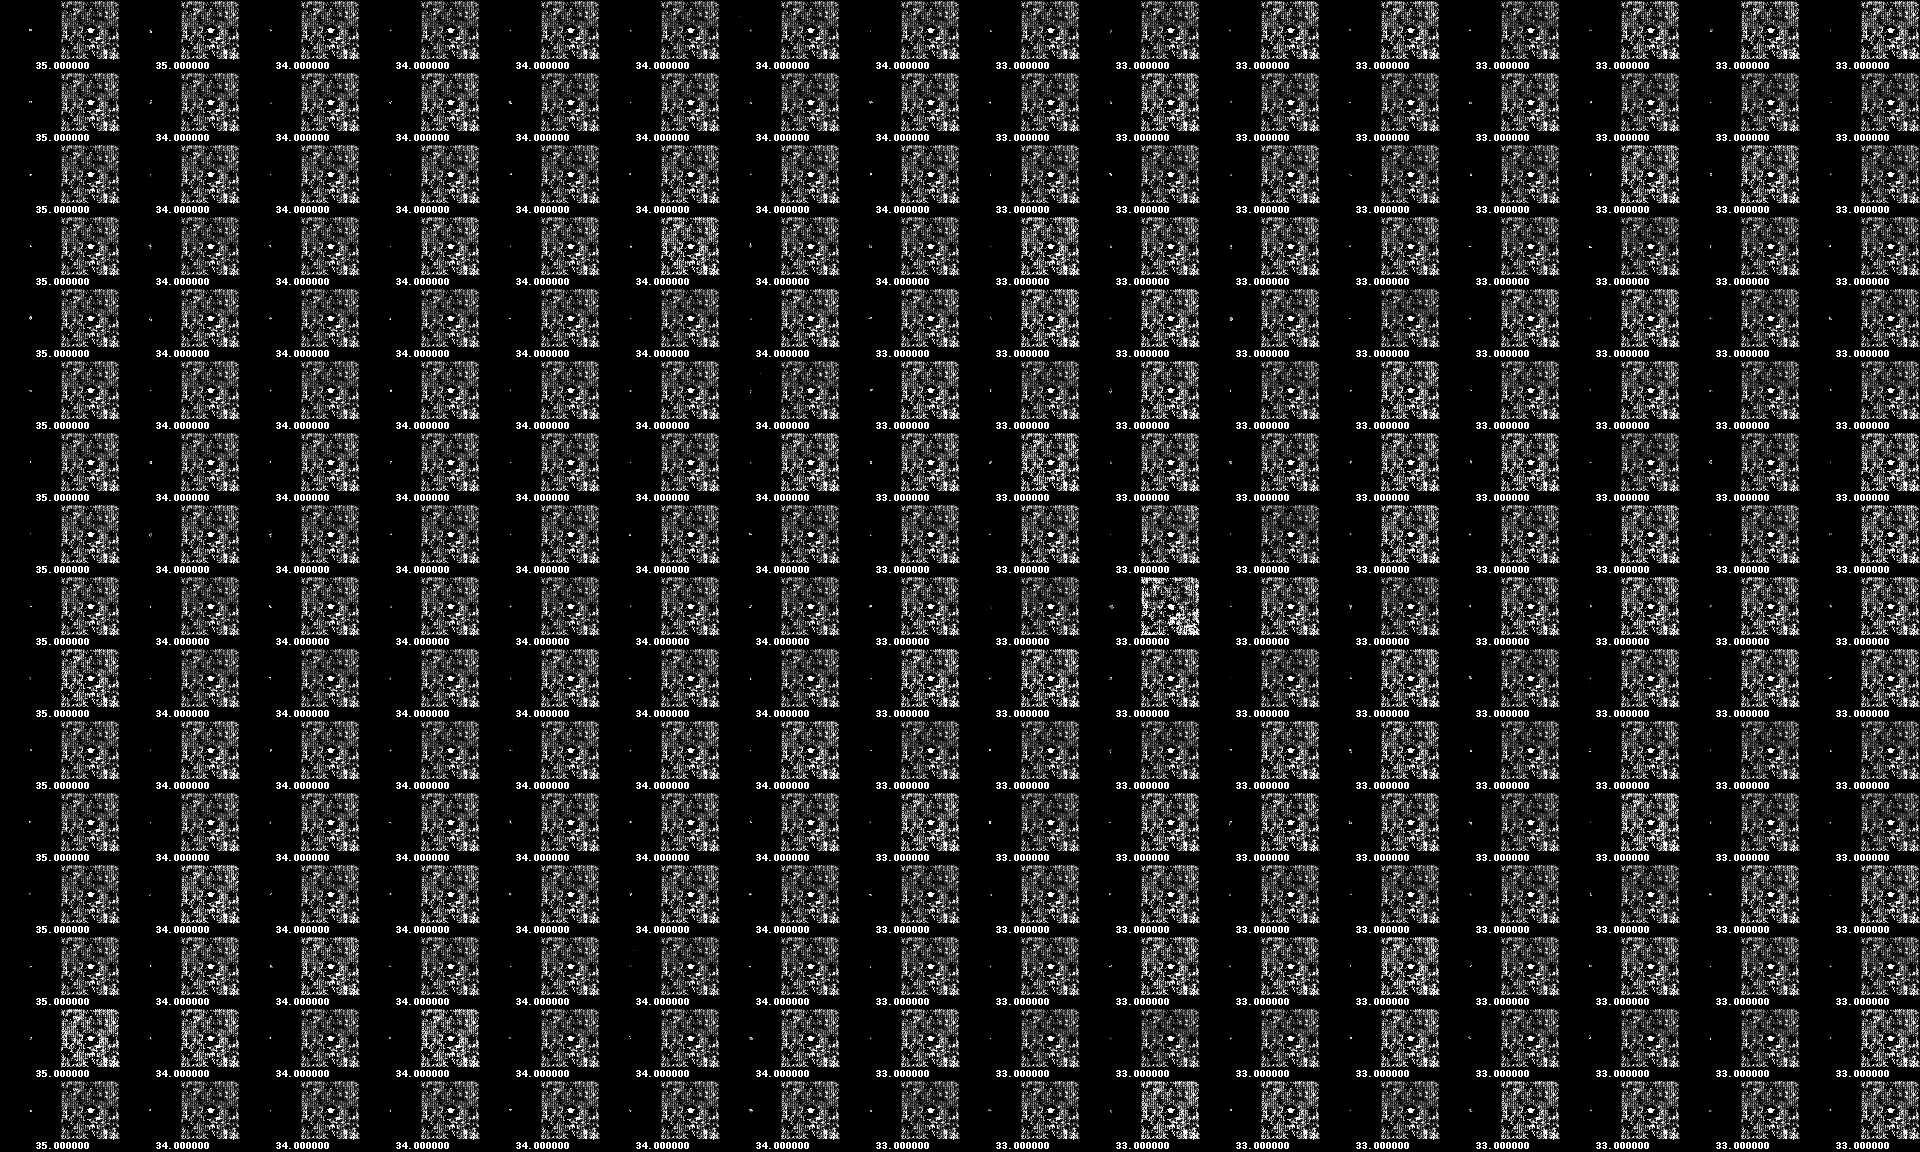

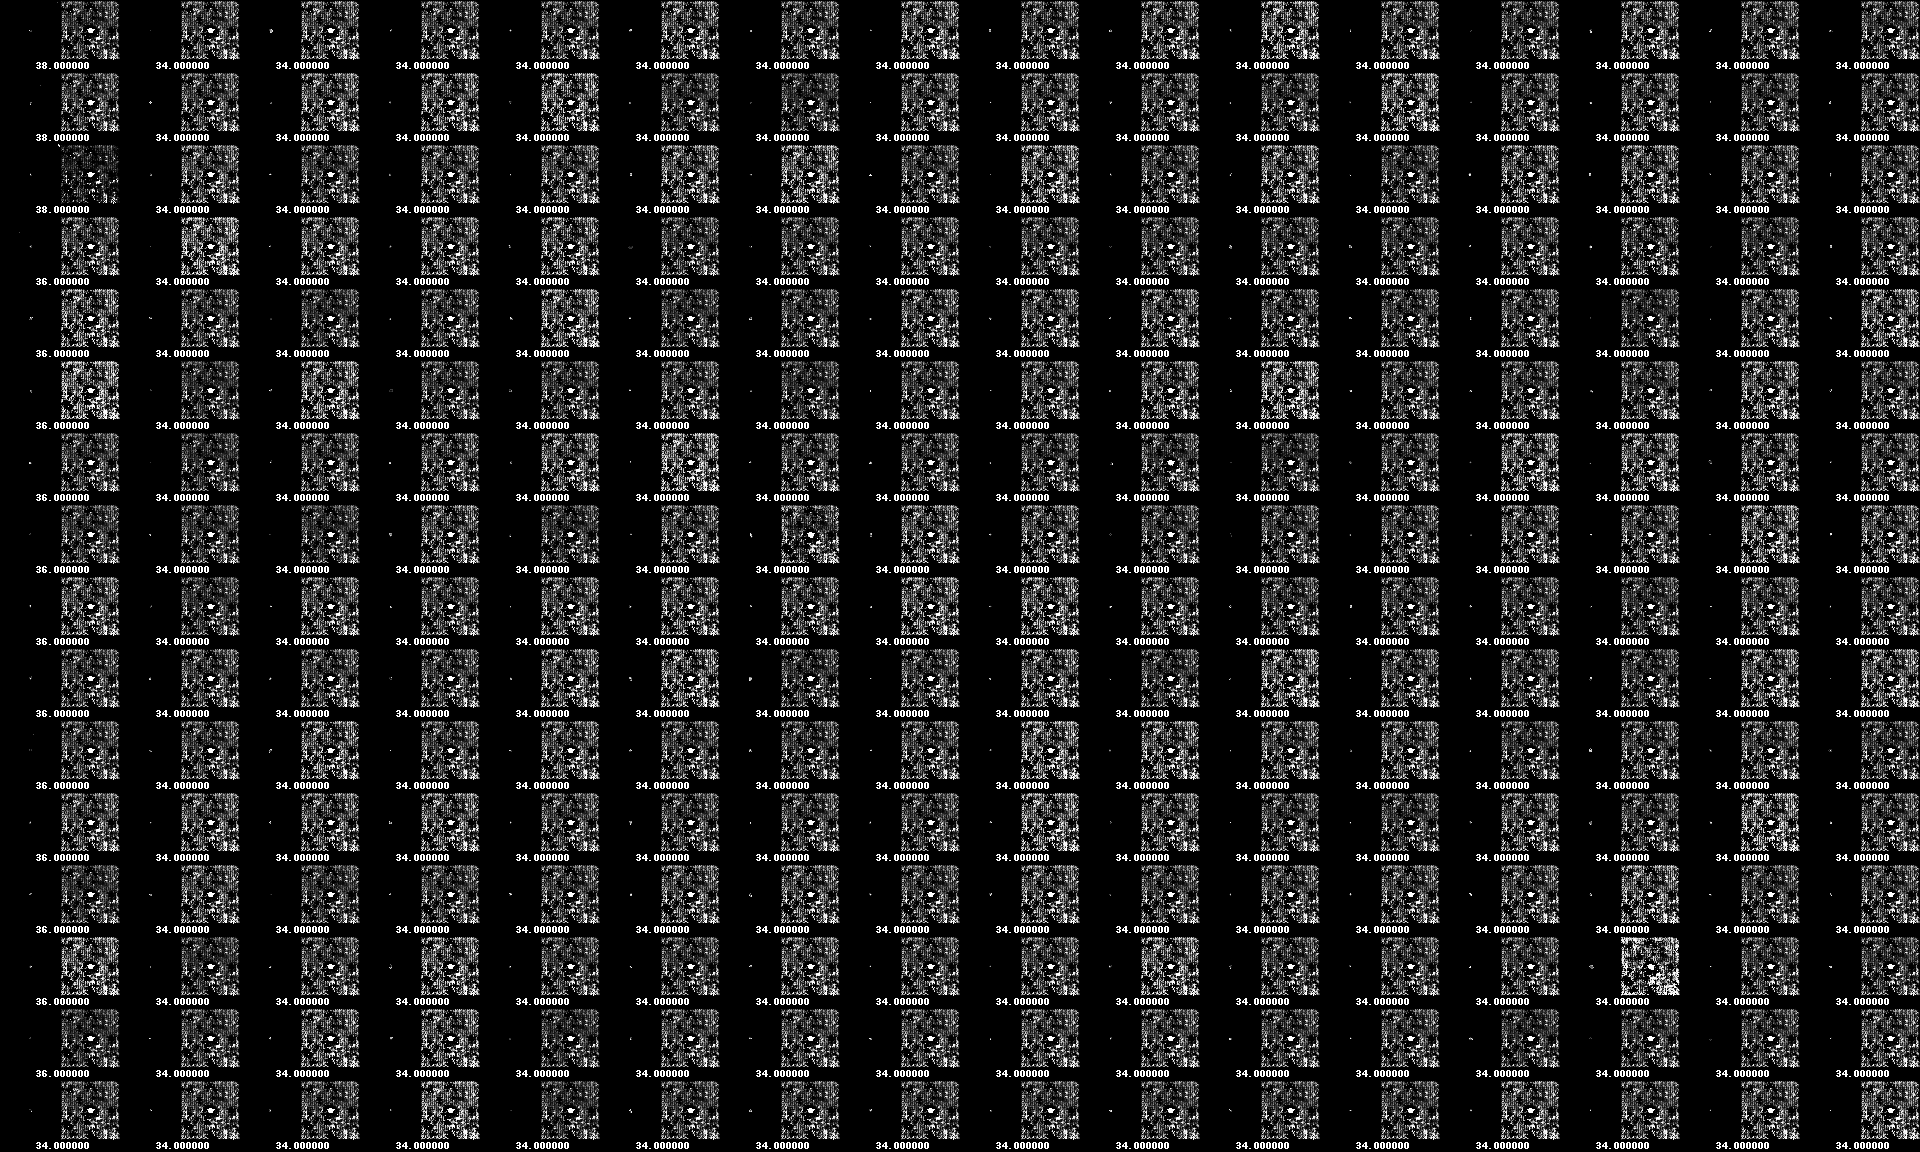

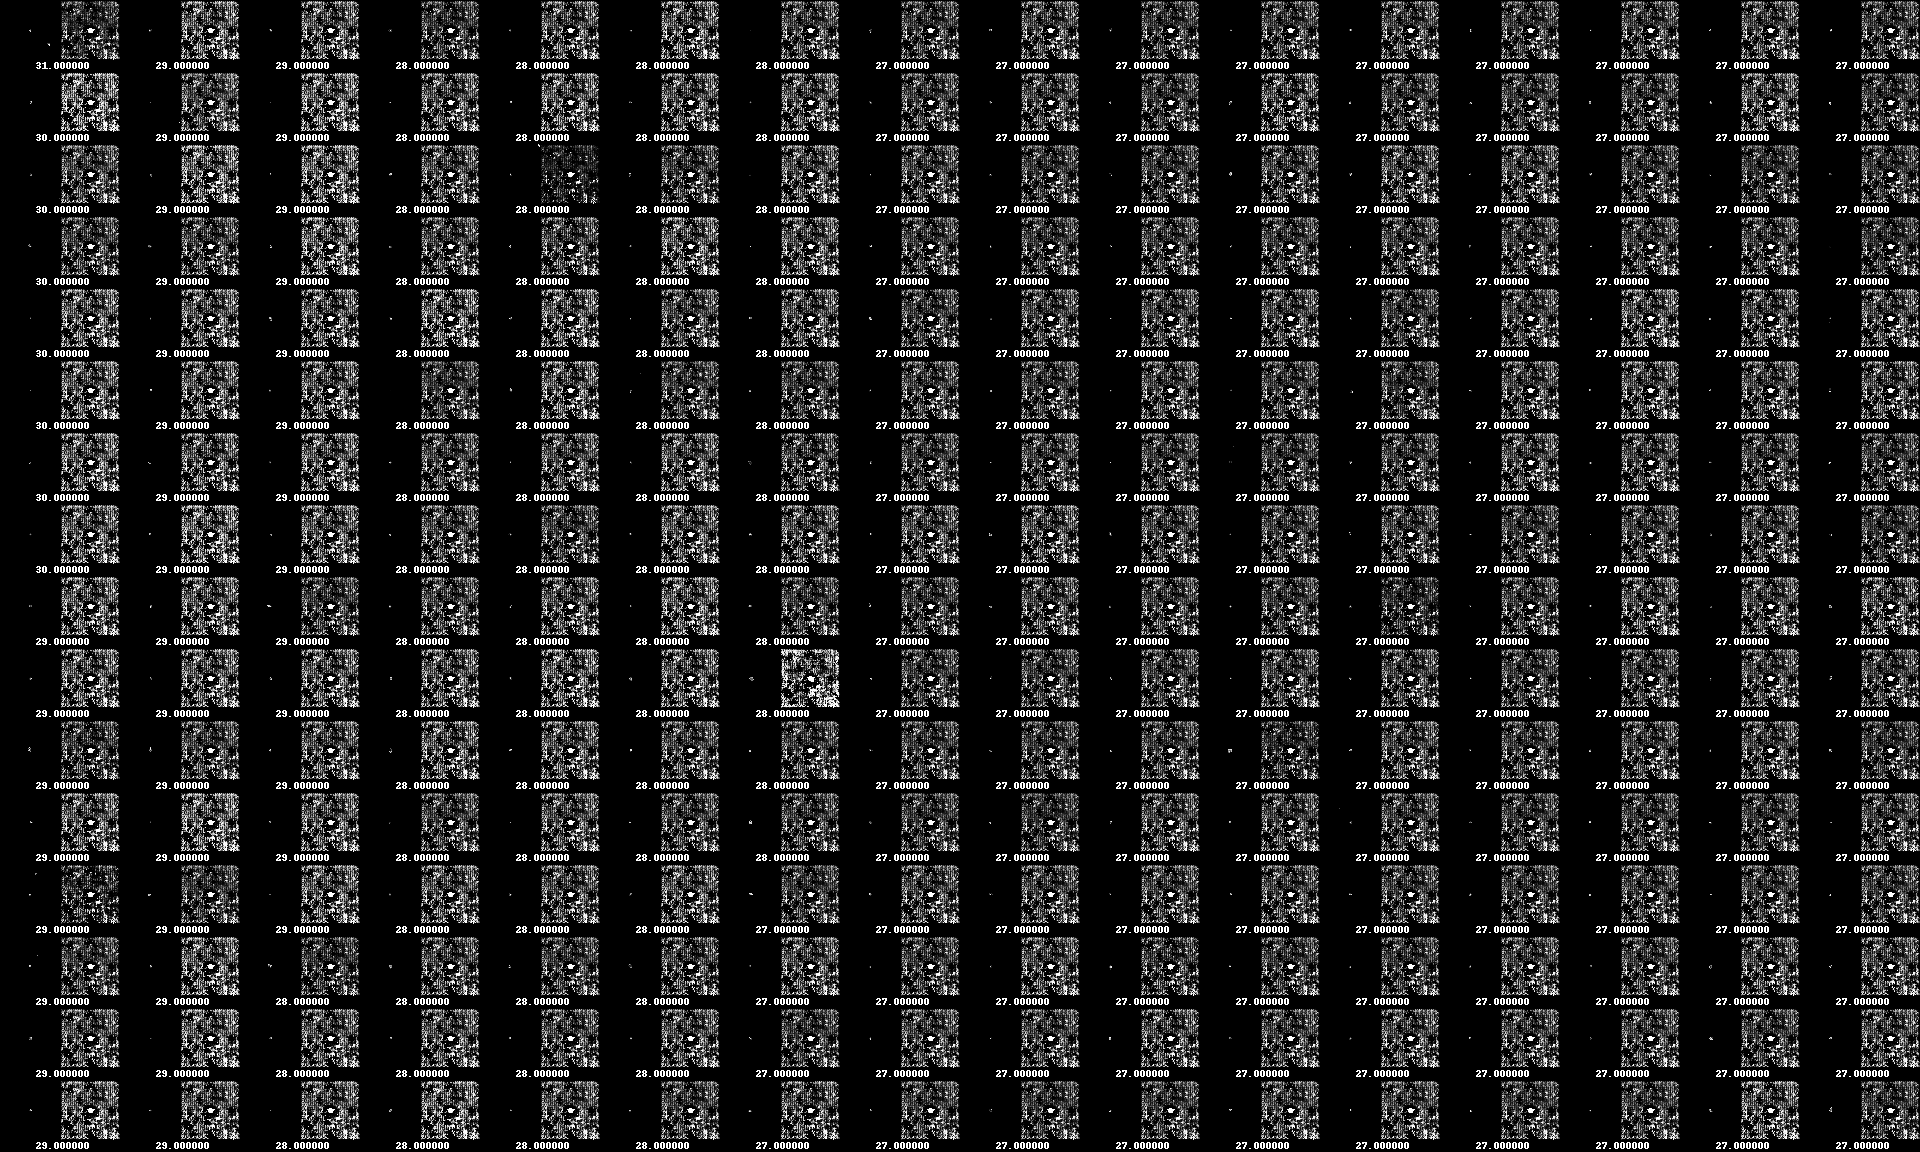

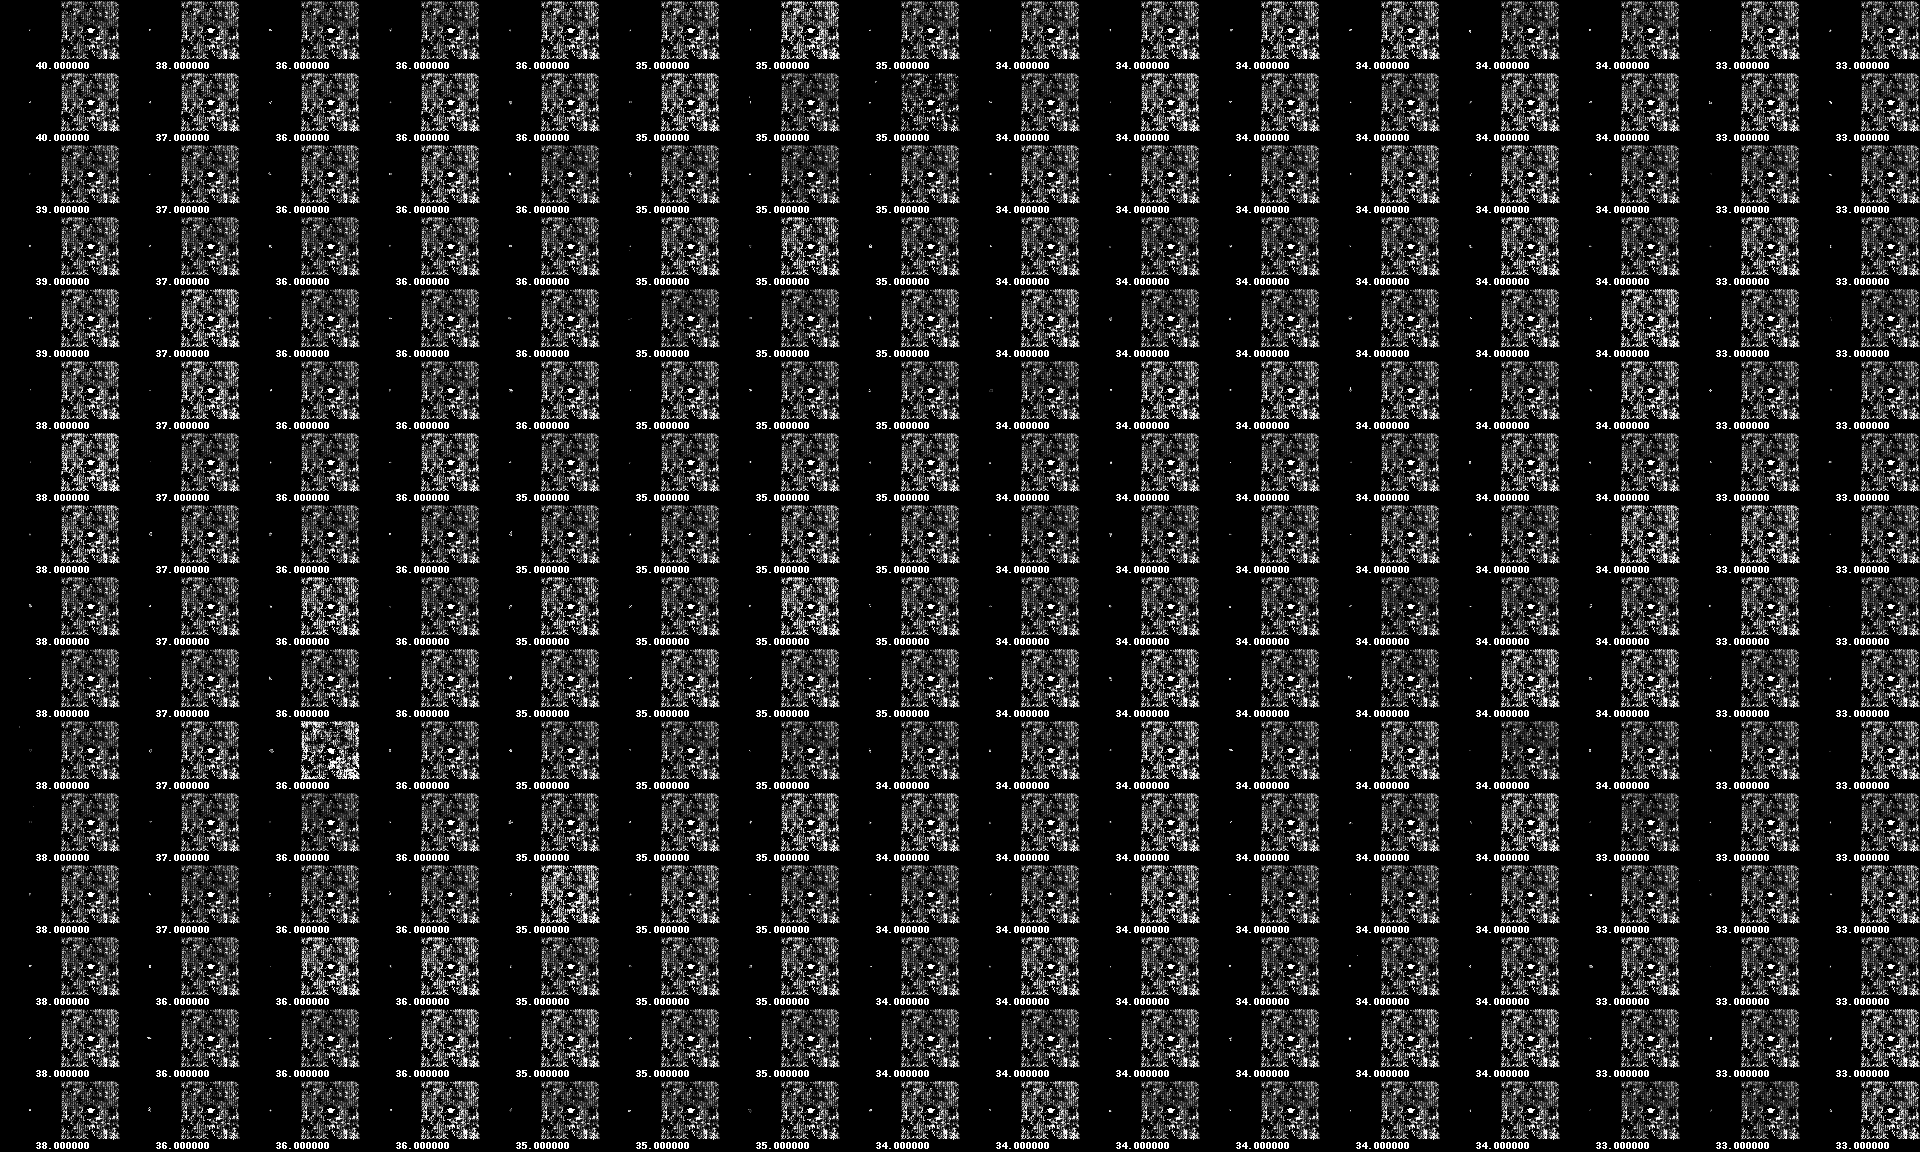

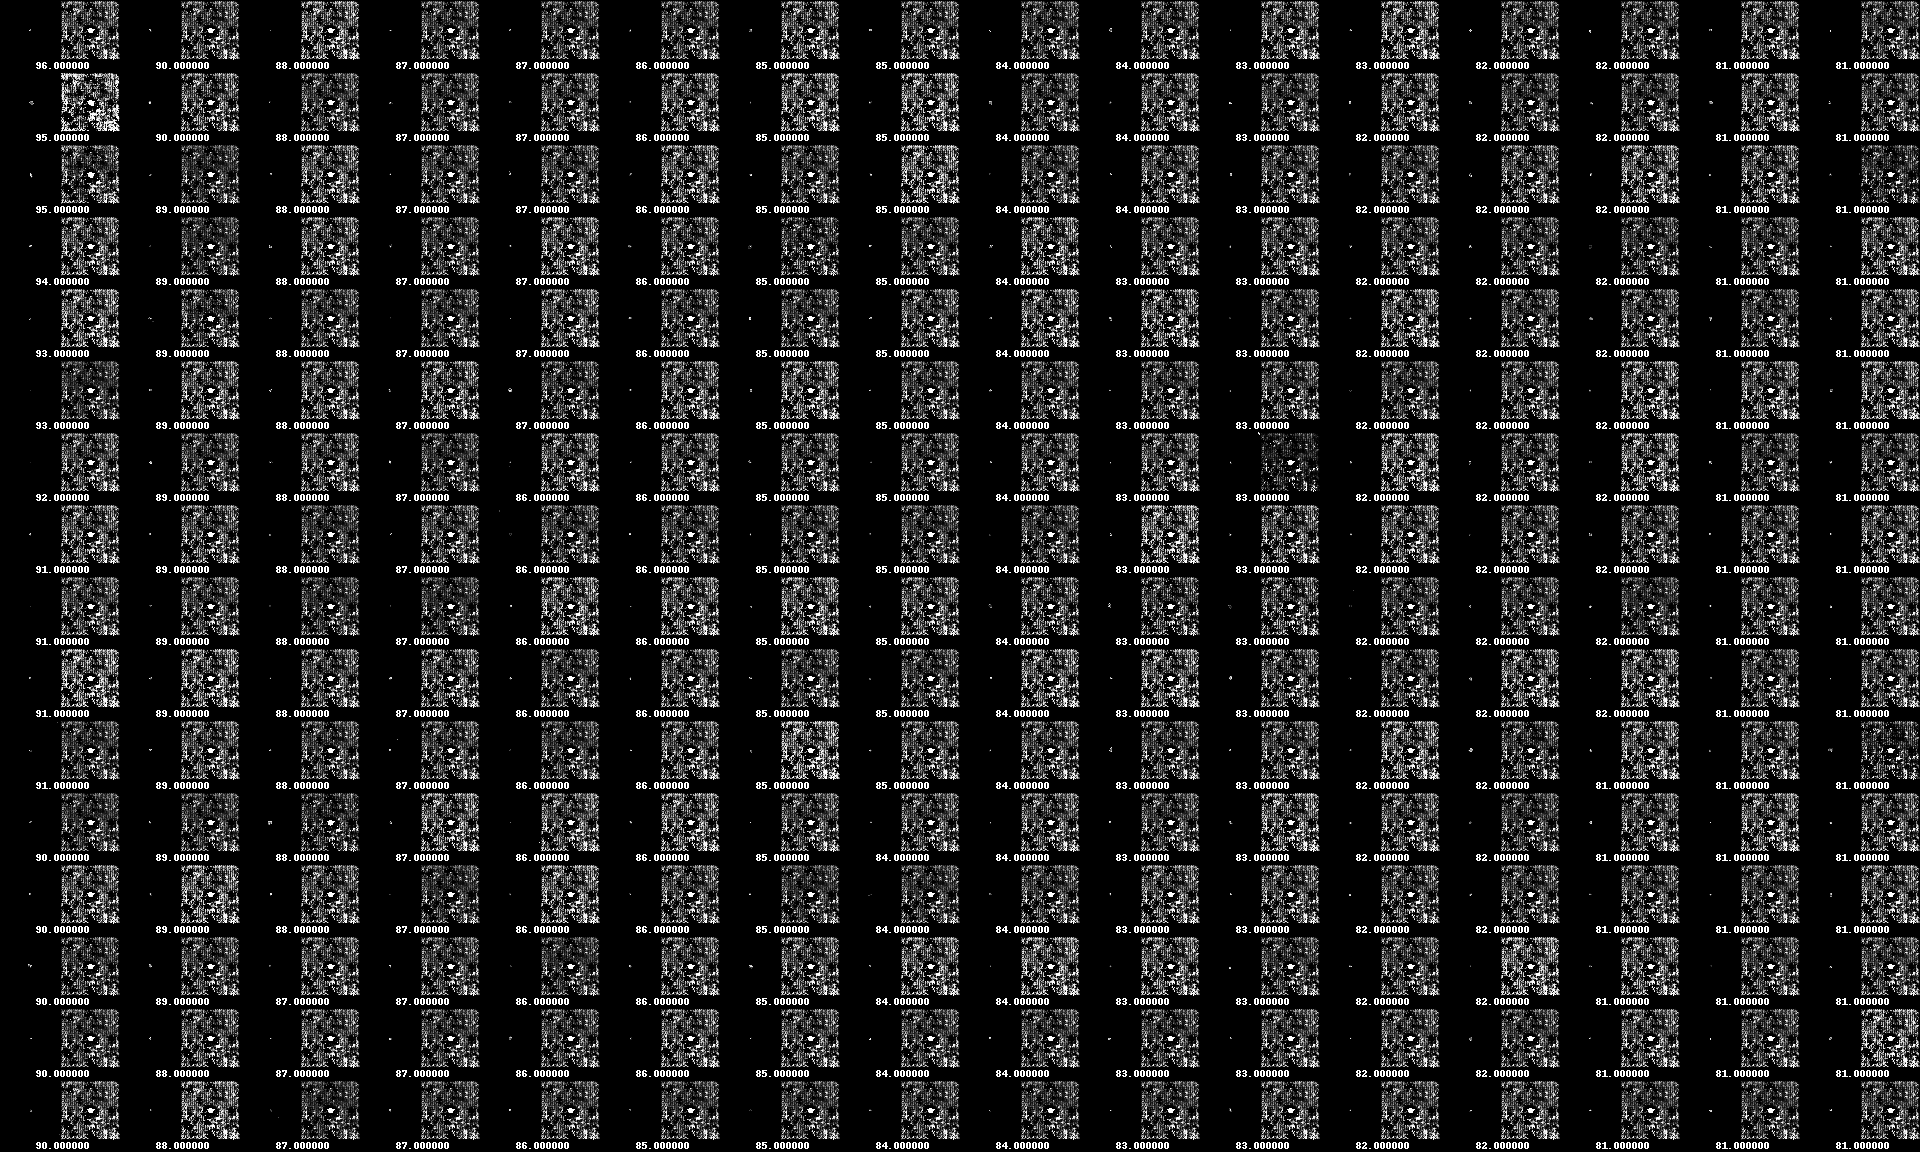


KeyboardInterrupt



Error in callback <function flush_figures at 0x00000248E9B08CA0> (for post_execute):



KeyboardInterrupt



In [3]:
load_and_test('dots', 100, autoencoder, 'original')

In [ ]:
load_and_test('worms', 100, autoencoder, 'original')

In [ ]:
load_and_test('tracks', 100, autoencoder, 'original')

In [ ]:
load_and_test('artifacts', 100, autoencoder, 'original')